# API 연동
공공데이터포털 오픈API 데이터형은 JSON을 XML로 전달하므로,   
request와 딕셔너리를 활용하면 됨

# JSON 활용 연습
http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31

In [1]:
import requests, json, pandas as pd

In [2]:
URL ='http://www.krei.re.kr:18181/chart/main_chart/index/kind/W/sdate/2019-01-01/edate/2019-12-31'
resp = requests.get(URL)

In [5]:
resp

<Response [200]>

In [8]:
# 텍스트
data1 = resp.text
print(type(data1), len(data1))
print(data1)

<class 'str'> 37824
[{"id":"41596","date":"20190102","symbol":null,"open":"184.63","close":"186.29","high":"187.67","low":"184.17","settlement":"186.2","volume":"91835"},{"id":"41597","date":"20190103","symbol":null,"open":"186.2","close":"188.77","high":"189.59","low":"185.92","settlement":"188.77","volume":"78995"},{"id":"41603","date":"20190104","symbol":null,"open":"188.77","close":"189.59","high":"190.6","low":"188.49","settlement":"189.96","volume":"70816"},{"id":"41609","date":"20190107","symbol":null,"open":"190.33","close":"189.78","high":"190.51","low":"188.68","settlement":"189.87","volume":"68009"},{"id":"41610","date":"20190108","symbol":null,"open":"189.78","close":"190.79","high":"192.72","low":"188.77","settlement":"190.24","volume":"118268"},{"id":"41617","date":"20190109","symbol":null,"open":"190.97","close":"190.88","high":"192.44","low":"190.42","settlement":"191.06","volume":"87637"},{"id":"41624","date":"20190110","symbol":null,"open":"190.88","close":"188.77","h

In [10]:
# json
data2 = resp.json()
print(type(data2), len(data2))
print(data2)

<class 'list'> 252
[{'id': '41596', 'date': '20190102', 'symbol': None, 'open': '184.63', 'close': '186.29', 'high': '187.67', 'low': '184.17', 'settlement': '186.2', 'volume': '91835'}, {'id': '41597', 'date': '20190103', 'symbol': None, 'open': '186.2', 'close': '188.77', 'high': '189.59', 'low': '185.92', 'settlement': '188.77', 'volume': '78995'}, {'id': '41603', 'date': '20190104', 'symbol': None, 'open': '188.77', 'close': '189.59', 'high': '190.6', 'low': '188.49', 'settlement': '189.96', 'volume': '70816'}, {'id': '41609', 'date': '20190107', 'symbol': None, 'open': '190.33', 'close': '189.78', 'high': '190.51', 'low': '188.68', 'settlement': '189.87', 'volume': '68009'}, {'id': '41610', 'date': '20190108', 'symbol': None, 'open': '189.78', 'close': '190.79', 'high': '192.72', 'low': '188.77', 'settlement': '190.24', 'volume': '118268'}, {'id': '41617', 'date': '20190109', 'symbol': None, 'open': '190.97', 'close': '190.88', 'high': '192.44', 'low': '190.42', 'settlement': '191

In [11]:
data2

[{'id': '41596',
  'date': '20190102',
  'symbol': None,
  'open': '184.63',
  'close': '186.29',
  'high': '187.67',
  'low': '184.17',
  'settlement': '186.2',
  'volume': '91835'},
 {'id': '41597',
  'date': '20190103',
  'symbol': None,
  'open': '186.2',
  'close': '188.77',
  'high': '189.59',
  'low': '185.92',
  'settlement': '188.77',
  'volume': '78995'},
 {'id': '41603',
  'date': '20190104',
  'symbol': None,
  'open': '188.77',
  'close': '189.59',
  'high': '190.6',
  'low': '188.49',
  'settlement': '189.96',
  'volume': '70816'},
 {'id': '41609',
  'date': '20190107',
  'symbol': None,
  'open': '190.33',
  'close': '189.78',
  'high': '190.51',
  'low': '188.68',
  'settlement': '189.87',
  'volume': '68009'},
 {'id': '41610',
  'date': '20190108',
  'symbol': None,
  'open': '189.78',
  'close': '190.79',
  'high': '192.72',
  'low': '188.77',
  'settlement': '190.24',
  'volume': '118268'},
 {'id': '41617',
  'date': '20190109',
  'symbol': None,
  'open': '190.97',


In [13]:
id_, date, symbol, open_, close= [], [], [], [], []

for item in data2 :
    id_.append(item['id'])
    date.append(item['date'])
    symbol.append(item['symbol'])
    open_.append(item['open'])
    close.append(item['close'])

In [14]:
df = pd.DataFrame({
    'id' : id_,
    'date' : date,
    'symbol' :symbol,
    'open' : open_,
    'close' : close,
})

In [15]:
df.head()

,id,date,symbol,open,close
0,41596,20190102,None,184.63,186.29
1,41597,20190103,None,186.2,188.77
2,41603,20190104,None,188.77,189.59
3,41609,20190107,None,190.33,189.78
4,41610,20190108,None,189.78,190.79


# 공공데이터포털 API 아파트매매 실거래자료 수집
https://wikidocs.net/85279
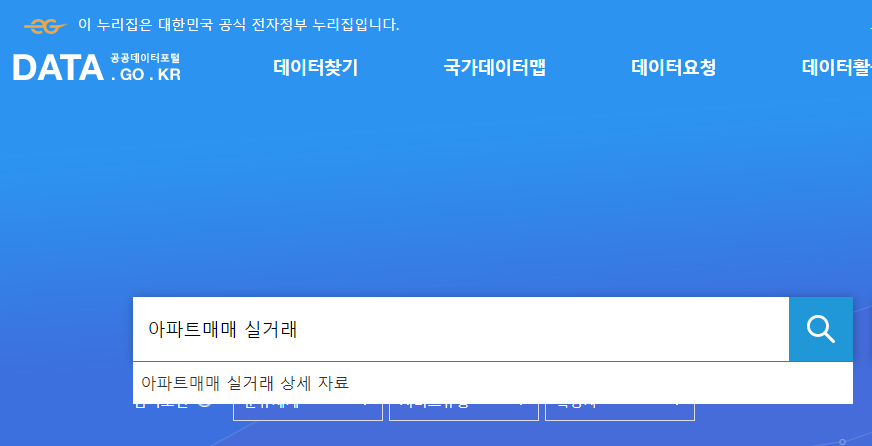

In [ ]:
BeautifulSoup?

In [20]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'UDEH8pQYdbqFh7nwICDvBx2lX%2FZf%2FroUUAZpQqNv%2B2sAU8mc3SGvzgL%2B6XdU7tn%2BYDoUH7%2BpSDN3tMjIVD6C9Q%3D%3D'

url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text
textsrc

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>      82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><아파트>롯데미도파광화문빌딩</아파트><월>12</월><일>22</일><전용면적>149.95</전용면적><중개사소재지> </중개사소재지><지번>145</지번><지역코드>11110</지역코드><층>8</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     130,000</거래금액><거래유형> </거래유형><건축년도>2004</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 내수동</법정동><아파트>킹스매너</아파트><월>12</월><일>8</일><전용면적>194.43</전용면적><중개사소재지> </중개사소재지><지번>110-15</지번><지역코드>11110</지역코드><층>6</층><해제사유발생일> 

In [ ]:
BeautifulSoup?

In [21]:
soup = BeautifulSoup(textsrc, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>      82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>      60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><아파트>롯데미도파광화문빌딩</아파트><월>12</월><일>22</일><전용면적>149.95</전용면적><중개사소재지> </중개사소재지><지번>145</지번><지역코드>11110</지역코드><층>8</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item><item><거래금액>     130,000</거래금액><거래유형> </거래유형><건축년도>2004</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 내수동</법정동><아파트>킹스매너</아파트><월>12</월><일>8</일><전용면적>194.43</전용면적><중개사소재지> </중개사소재지><지번>110-15</지번><지역코드>11110</지역코드><층>6</층><해제사유발생일> </해제사유발생일><해제여부> 

In [22]:
items = soup.select('response > body > items > item') 
items

[<item><거래금액>      82,500</거래금액><거래유형> </거래유형><건축년도>2008</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 사직동</법정동><아파트>광화문스페이스본(101동~105동)</아파트><월>12</월><일>10</일><전용면적>94.51</전용면적><중개사소재지> </중개사소재지><지번>9</지번><지역코드>11110</지역코드><층>11</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>      60,000</거래금액><거래유형> </거래유형><건축년도>1981</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 당주동</법정동><아파트>롯데미도파광화문빌딩</아파트><월>12</월><일>22</일><전용면적>149.95</전용면적><중개사소재지> </중개사소재지><지번>145</지번><지역코드>11110</지역코드><층>8</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>     130,000</거래금액><거래유형> </거래유형><건축년도>2004</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><법정동> 내수동</법정동><아파트>킹스매너</아파트><월>12</월><일>8</일><전용면적>194.43</전용면적><중개사소재지> </중개사소재지><지번>110-15</지번><지역코드>11110</지역코드><층>6</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>,
 <item><거래금액>     105,000</거래금액><거래유형> </거래유형><건축년도>2004</건축년도><년>2015</년><동> </동><등기일자> </등기일자><매도자> </매도자><매수자> </매수자><

In [23]:
a = items[0].select('거래금액')
print(type(a))
print(a)

<class 'bs4.element.ResultSet'>
[<거래금액>      82,500</거래금액>]


In [24]:
b = items[0].select_one('거래금액')
print(type(b))
print(b)

<class 'bs4.element.Tag'>
<거래금액>      82,500</거래금액>


In [25]:
c = items[0].select_one('거래금액').text
print(type(c))
print(c)

<class 'str'>
      82,500


In [26]:
import requests
from bs4 import BeautifulSoup

date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')

items = soup.select('response > body > items > item') 

for item in items:
    print(item.select_one('거래금액').text.strip(),
          item.select_one('건축년도').text,
          item.select_one('년').text,
          item.select_one('법정동').text.strip(),
          item.select_one('아파트').text,
          item.select_one('월').text,
          item.select_one('일').text,
          item.select_one('전용면적').text,
          item.select_one('지번').text,
          item.select_one('지역코드').text,
          item.select_one('층').text)

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12


In [27]:
# 반복되는 코드 정리
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

for item in items:
    for tag in item_list:
        print(item.select_one(tag).text.strip(), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## 결측값 채우기
요청 정보에 대한 응답 데이터가 없을 수도 있다.   
이 경우 별도 처리가 없으면 오류가 발생하므로 대응이 필요하다.

In [28]:
import requests
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
date = '201512'
region_code = '11110'
apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
for item in items:
    for tag in item_list:
        print(default_text(item.select_one(tag), ''), end=' ')
    print()

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 11110 11 
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 11110 8 
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 11110 6 
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 11110 8 
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 11110 4 
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 11110 8 
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 11110 4 
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 11110 3 
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 11110 18 
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 11110 12 


## csv 파일 저장

In [32]:
import requests, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

date = '201512'
region_code = '11110'
apikey = 'UDEH8pQYdbqFh7nwICDvBx2lX%2FZf%2FroUUAZpQqNv%2B2sAU8mc3SGvzgL%2B6XdU7tn%2BYDoUH7%2BpSDN3tMjIVD6C9Q%3D%3D'
url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

res = requests.get(url)
textsrc = res.text

soup = BeautifulSoup(textsrc, 'xml')
items = soup.select('response > body > items > item') 

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []

for item in items:
    data_list.append([ default_text(item.select_one(tag), '') for tag in item_list]) # value를 행기준으로 맞춤, 110 X 11
print(data_list)

df = pd.DataFrame(data_list, columns=item_list)
print('='*50)
print(df)
df.to_csv('./sample/아파트매매실거래자료수집.csv', index=False, encoding='cp949') 

[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '11110', '8'], ['120,000', '2003', '2015', '내수동', '경희궁파크팰리스', '12', '24', '146.33', '95', '11110', '4'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '17', '16.98', '195-10', '11110', '8'], ['17,000', '2014', '2015', '연건동', '이화에수풀', '12', '18', '16.98', '195-10', '11110', '4'], ['57,000', '2006', '2015', '명륜1가', '렉스빌', '12', '29', '106.98', '19', '11110', '3'], ['44,000', '1995', '2015', '명륜2가', '아남1', '12', '1', '84.8', '4', '11110', '18'], ['52,000', '1995', '2015', '명륜2가', '아남1', '12', '10', '84.9', '4', '11110', '12'], ['49,800', '1995', '2015', '명륜2가', '아남1', '12', '19', '84.8', '4', '11110', '1'], ['41,000', '1999', '2015', '

In [30]:
# 기존 코드
l = []
for item in items:
    print(default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), ''))
    l.append([default_text(item.select_one('거래금액'), ''),
          default_text(item.select_one('건축년도'), ''),
          default_text(item.select_one('년'), ''),
          default_text(item.select_one('법정동'), ''),
          default_text(item.select_one('아파트'), ''),
          default_text(item.select_one('월'), ''),
          default_text(item.select_one('일'), ''),
          default_text(item.select_one('전용면적'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지번'), ''),
          default_text(item.select_one('지역코드'), ''),
          default_text(item.select_one('층'), '')])
print(l)

82,500 2008 2015 사직동 광화문스페이스본(101동~105동) 12 10 94.51 9 9 11110 11
60,000 1981 2015 당주동 롯데미도파광화문빌딩 12 22 149.95 145 145 11110 8
130,000 2004 2015 내수동 킹스매너 12 8 194.43 110-15 110-15 11110 6
105,000 2004 2015 내수동 경희궁의아침2단지 12 14 124.17 71 71 11110 8
120,000 2003 2015 내수동 경희궁파크팰리스 12 24 146.33 95 95 11110 4
17,000 2014 2015 연건동 이화에수풀 12 17 16.98 195-10 195-10 11110 8
17,000 2014 2015 연건동 이화에수풀 12 18 16.98 195-10 195-10 11110 4
57,000 2006 2015 명륜1가 렉스빌 12 29 106.98 19 19 11110 3
44,000 1995 2015 명륜2가 아남1 12 1 84.8 4 4 11110 18
52,000 1995 2015 명륜2가 아남1 12 10 84.9 4 4 11110 12
[['82,500', '2008', '2015', '사직동', '광화문스페이스본(101동~105동)', '12', '10', '94.51', '9', '9', '11110', '11'], ['60,000', '1981', '2015', '당주동', '롯데미도파광화문빌딩', '12', '22', '149.95', '145', '145', '11110', '8'], ['130,000', '2004', '2015', '내수동', '킹스매너', '12', '8', '194.43', '110-15', '110-15', '11110', '6'], ['105,000', '2004', '2015', '내수동', '경희궁의아침2단지', '12', '14', '124.17', '71', '71', '11110', '8'], ['120,000', '2003', '

## 여러달 수집

In [34]:
import datetime, dateutil
start_datetime = datetime.datetime(2023, 1, 1)
start_datetime

datetime.datetime(2023, 1, 1, 0, 0)

In [35]:
start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)
start_datetime 

datetime.datetime(2023, 2, 1, 0, 0)

In [36]:
date = start_datetime.strftime('%Y%m') #
date

'202302'

In [40]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text
    
start_datetime = datetime.datetime(2023, 1, 1)

data_list = []
item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']

while True:
    date = start_datetime.strftime('%Y%m') #202301
    
    if date >= '202309':
        break
        
    region_code = '11110'
    
    apikey = 'UDEH8pQYdbqFh7nwICDvBx2lX%2FZf%2FroUUAZpQqNv%2B2sAU8mc3SGvzgL%2B6XdU7tn%2BYDoUH7%2BpSDN3tMjIVD6C9Q%3D%3D'
    url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?LAWD_CD={region_code}&DEAL_YMD={date}&serviceKey={apikey}'

    res = requests.get(url)
    textsrc = res.text

    soup = BeautifulSoup(textsrc, 'xml')
    items = soup.select('response > body > items > item') 
    
    print('='*10, date, '='*10)
    
    for item in items:
        data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
    
    start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1)  # += 1달 

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949') 

========== 202301 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7']]
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12']]
[['200,000', '2008', '2023', '사직동', '

========== 202304 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202306 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

========== 202307 ==========
[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '1

[['200,000', '2008', '2023', '사직동', '광화문스페이스본(106동)', '1', '20', '163.33', '9-1', '11110', '12'], ['79,000', '2006', '2023', '인의동', '효성쥬얼리시티', '1', '26', '84.7', '48-2', '11110', '17'], ['12,200', '2014', '2023', '숭인동', '숭인한양LEEPS', '1', '20', '12.78', '1421-2', '11110', '7'], ['169,000', '2017', '2023', '홍파동', '경희궁자이(2단지)', '1', '27', '84.8359', '199', '11110', '12'], ['18,900', '1997', '2023', '평창동', '갑을아파트', '1', '28', '30.46', '595', '11110', '6'], ['155,500', '2008', '2023', '무악동', '인왕산아이파크', '1', '10', '114.931', '60', '11110', '16'], ['99,960', '2000', '2023', '무악동', '현대', '1', '26', '84.92', '82', '11110', '6'], ['145,000', '2008', '2023', '사직동', '광화문스페이스본(101동~105동)', '2', '8', '108.07', '9', '11110', '9'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['185,000', '2003', '2023', '내수동', '경희궁파크팰리스', '2', '21', '146.39', '95', '11110', '13'], ['38,000', '2015', '2023', '연지동', '아르젠종로', '2', '28', '47.24', '163-3', '11110', '13'], ['18,8

## 여러 지역 코드 수집
지역 코드 : 각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리   
https://www.data.go.kr/data/15123287/fileData.do

```python
# import csv
# with open('region_code.csv', 'r', encoding='euc-kr') as f :
#     for line in csv.reader(f):
#         print(line)
data = pd.read_csv("region_code.csv", sep=",")
data
```

In [41]:
import requests, datetime, dateutil, pandas as pd
from bs4 import BeautifulSoup

def default_text(node, text):
    if node != None:
        return node.text.strip()
    else:
        return text

item_list = ['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층']
data_list = []        
lawd_cds = [11140, 11170, 11200]
# lawd_cds = [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
#        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
#        11560, 11590, 11620, 11650, 11680, 11710, 11740]

start_datetime = datetime.datetime(2023, 1, 1)

while True:
    apikey = 'QjITnZtxSg5%2Bhzh%2BWR8hYLMstCDRuf1REcb5E59648Wy77%2B7z8aQBHgv95ylOhyoP31mFZWlyiqd2TrMu7HTuw%3D%3D'    
    
    date = start_datetime.strftime('%Y%m') #202301
    if date >= '202309':
        break
        
    for lawd_cd in lawd_cds:
        print('='*5, date, lawd_cd, '='*5)
        url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?LAWD_CD={lawd_cd}&DEAL_YMD={date}&serviceKey={apikey}'

        res = requests.get(url)
        textsrc = res.text

        soup = BeautifulSoup(textsrc, 'xml')
        items = soup.select('response > body > items > item') 
           
        for item in items:
            data_list.append([ default_text(item.select_one(i), '') for i in item_list]) # value를 행기준으로 맞춤, 110 X 11
        print(data_list)
        
        start_datetime = start_datetime + dateutil.relativedelta.relativedelta(months=1) #  += 1달

df = pd.DataFrame(data_list, columns=item_list)
df.to_csv('./sample/아파트매매 실거래자료.csv', index=False, encoding='cp949')
print('저장 완료')

===== 202301 11140 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4']]
===== 202301 11170 =====
[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75',

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

[['21,500', '2016', '2023', '충무로5가', '충무로엘크루메크로시티2차', '1', '18', '22.75', '36-2', '11140', '5'], ['27,000', '1968', '2023', '인현동2가', '인현상가/신성아파트', '1', '30', '52.1', '192-30', '11140', '6'], ['18,250', '1981', '2023', '장충동2가', '장충', '1', '6', '62.48', '193-29', '11140', '1'], ['145,000', '2002', '2023', '신당동', '남산타운', '1', '6', '114.88', '844', '11140', '14'], ['117,500', '2002', '2023', '신당동', '남산타운', '1', '7', '84.88', '844', '11140', '8'], ['114,500', '2011', '2023', '신당동', '청구e편한세상', '1', '9', '84.95', '852', '11140', '2'], ['89,500', '2002', '2023', '신당동', '남산타운', '1', '14', '59.94', '844', '11140', '12'], ['128,000', '2011', '2023', '신당동', '래미안하이베르', '1', '17', '117', '851', '11140', '11'], ['90,000', '2002', '2023', '신당동', '남산타운', '1', '25', '59.94', '844', '11140', '13'], ['23,000', '2021', '2023', '신당동', '약수역더시티', '1', '26', '19.06', '857', '11140', '4'], ['105,000', '1980', '2023', '후암동', '후암미주', '1', '26', '63.44', '423-1', '11170', '4'], ['85,000', '2004', '2023', '후암동', '신

# 네이버 지식인 API 연동
https://developers.naver.com/docs/serviceapi/search/kin/kin.md#%EC%A7%80%EC%8B%9DiN

In [9]:
import requests, time, os, json
from html import unescape

In [10]:
# input
client_id = 'zbP2KJF8xSxDGL1lW_kl'
client_secret = 'al5n99ZnlW'

queries = ['벚꽃 명소', '일본 여행']
goal_page = 5

In [11]:
# setting
user_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) " + \
             "AppleWebKit/537.36 (KHTML, like Gecko) " + \
             "Chrome/122.0.0.0 Safari/537.36"

headers = {"User-Agent": user_agent,
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret}

In [12]:
file_name = './sample/naver_kin.txt'

with open(file_name, 'w', encoding='utf-8') as f :
    f.write('query\tno\ttitle\tlink\tdescription\ttotal_text\n')

In [13]:
url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + queries[0] + "&start=" + str(1)
response = requests.get(url, headers=headers)
response

<Response [200]>

In [14]:
print(response.text)

{
	"lastBuildDate":"Fri, 15 Mar 2024 13:18:13 +0900",
	"total":8084,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"통영 여행 데이트코스 <b>벚꽃명소<\/b> 가르켜주세요",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90111&docId=466140138&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... <b>벚꽃 명소<\/b>로 가볼만한 곳 중에서는 통영 동피랑 마을, 미륵산, 봉숫골 등 있으며 이 외 주변에 둘러볼만한 곳들도 많이 있으니 여행하시는데 참고하시기 바랍니다. 도움이 되셨다면 채택 부탁드립니다! 감사합니다 :)"
		},
		{
			"title":"경기도 <b>벚꽃 명소<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=12&dirId=120936&docId=466155838&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"경기도 주변 <b>벚꽃명소<\/b>가 있을까요? 사람 좀 적은데로 알려주세요  안녕하세요~~ 경기도 <b>벚꽃 명소<\/b> 찾고 계시나 봐요? 그렇다면 아름다운 벚꽃이 가득한 남이섬은 어떨까요? 4월 초부터 4월 중순까지 벚꽃 개화시기가 예상되는데요... "
		},
		{
			"title":"충남 <b>벚꽃 명소<\/b> 알려주세요",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=901&docId=465697511&qb=67Ka6r2DIOuqheyG

In [50]:
json.loads(response.text)

{'lastBuildDate': 'Fri, 15 Mar 2024 11:36:43 +0900',
 'total': 41223,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '},
  {'title': '<b>전주</b> 숙소 갈만한 곳좀 알려주세요!',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '... 남자친구랑 오랜만에 <b>전주 여행</b>이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... '},
  {'title': '1박2일 <b>전주</b> 커플<b>여행</b>',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank

In [51]:
json.loads(response.text)['items']

[{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
  'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '},
 {'title': '<b>전주</b> 숙소 갈만한 곳좀 알려주세요!',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90114&docId=464349677&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
  'description': '... 남자친구랑 오랜만에 <b>전주 여행</b>이라 정말 괜찮은 전주 숙소로 예약하고 싶어서요 많이 많이 답변해주세효~ㅋㅋ 안녕하세요, 여행할때 여기어때 입니다. 질문하신 [전주 숙소] 관련 답변 드리도록 하겠습니다. ▶다음은... '},
 {'title': '1박2일 <b>전주</b> 커플<b>여행</b>',
  'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=461495433&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0',
  'description': '... <b>전주 여행</b>에 대해 도움을 드릴게요. 1. 남자친구의 차를 이용할지 KTX를 이용할지에 대해서는 여러 가지 요소를 

In [52]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b>코스좀짜주세요ㅜㅜ',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=121305&docId=465655085&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... 알려주세요ㅠㅠ  <b>전주여행</b>코스좀짜주세요ㅜㅜ 전주처음가봅니다 뚜벅이여행으로좋다고해서가보려고하는데요! 전주역에서출발하려고합니다! 전주동물원,전주객리단길카페거리,전주한옥마을, 이렇게가려고하는데 어딜먼저가야... '}

In [15]:
def get_list(query, page):
    print('='*5, query, page, '='*5)
    url = "https://openapi.naver.com/v1/search/kin.json?display=100&query=" + query + "&start=" + str(page+1)
    response = requests.get(url, headers=headers)
    elements = json.loads(response.text)['items']

    for i, elm in enumerate(elements):
        title = elm['title'].replace("<b>", "").replace("</b>", "")
        title = unescape(title) # escape된 문자를 unescape문자로 변경
        link = elm['link']
        description = unescape(elm['description'].replace("<b>", "").replace("</b>", ""))
        description = unescape(description)
        
        print([query, (page*100)+(i+1), title, link, description, title+" "+description])

        with open(file_name, 'a', encoding='utf-8') as f: # overwrite 안되도록 add할 것
            f.write( f'{query}\t{(page*100)+(i+1)}\t{title}\t{link}\t{description}\t{title+" "+description}\n')

    return

In [16]:
for query in queries:
    for page in range(goal_page):
        kin_list = get_list(query, page)
        time.sleep(0.5) #웹페이지 크롤링 매너 최소 6초

===== 벚꽃 명소 0 =====
['벚꽃 명소', 1, '통영 여행 데이트코스 벚꽃명소 가르켜주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=466140138&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0', '... 벚꽃 명소로 가볼만한 곳 중에서는 통영 동피랑 마을, 미륵산, 봉숫골 등 있으며 이 외 주변에 둘러볼만한 곳들도 많이 있으니 여행하시는데 참고하시기 바랍니다. 도움이 되셨다면 채택 부탁드립니다! 감사합니다 :)', '통영 여행 데이트코스 벚꽃명소 가르켜주세요 ... 벚꽃 명소로 가볼만한 곳 중에서는 통영 동피랑 마을, 미륵산, 봉숫골 등 있으며 이 외 주변에 둘러볼만한 곳들도 많이 있으니 여행하시는데 참고하시기 바랍니다. 도움이 되셨다면 채택 부탁드립니다! 감사합니다 :)']
['벚꽃 명소', 2, '경기도 벚꽃 명소', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=120936&docId=466155838&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '경기도 주변 벚꽃명소가 있을까요? 사람 좀 적은데로 알려주세요  안녕하세요~~ 경기도 벚꽃 명소 찾고 계시나 봐요? 그렇다면 아름다운 벚꽃이 가득한 남이섬은 어떨까요? 4월 초부터 4월 중순까지 벚꽃 개화시기가 예상되는데요... ', '경기도 벚꽃 명소 경기도 주변 벚꽃명소가 있을까요? 사람 좀 적은데로 알려주세요  안녕하세요~~ 경기도 벚꽃 명소 찾고 계시나 봐요? 그렇다면 아름다운 벚꽃이 가득한 남이섬은 어떨까요? 4월 초부터 4월 중순까지 벚꽃 개화시기가 예상되는데요... ']
['벚꽃 명소', 3, '충남 벚꽃 명소 알려주세요', 'https://kin.naver.com/qna/

===== 벚꽃 명소 1 =====
['벚꽃 명소', 101, '경기도 벚꽃 명소', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=120936&docId=466155838&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '경기도 주변 벚꽃명소가 있을까요? 사람 좀 적은데로 알려주세요  안녕하세요~~ 경기도 벚꽃 명소 찾고 계시나 봐요? 그렇다면 아름다운 벚꽃이 가득한 남이섬은 어떨까요? 4월 초부터 4월 중순까지 벚꽃 개화시기가 예상되는데요... ', '경기도 벚꽃 명소 경기도 주변 벚꽃명소가 있을까요? 사람 좀 적은데로 알려주세요  안녕하세요~~ 경기도 벚꽃 명소 찾고 계시나 봐요? 그렇다면 아름다운 벚꽃이 가득한 남이섬은 어떨까요? 4월 초부터 4월 중순까지 벚꽃 개화시기가 예상되는데요... ']
['벚꽃 명소', 102, '충남 벚꽃 명소 알려주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=901&docId=465697511&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '충남지역 벚꽃 명소가 알고 싶습니다. 다만 고속버스 3대정도 주차가 가능해야 합니다.... 혹시 주차시설 좋은 벚꽃 장소가 있을까요?? 천장호가 있는 칠갑산 추천합니다 https://blog.naver.com/jongim622... ', '충남 벚꽃 명소 알려주세요 충남지역 벚꽃 명소가 알고 싶습니다. 다만 고속버스 3대정도 주차가 가능해야 합니다.... 혹시 주차시설 좋은 벚꽃 장소가 있을까요?? 천장호가 있는 칠갑산 추천합니다 https://blog.naver.com/jongim622... ']
['벚꽃 명소', 103, '부산 벚꽃 명소 쫌 알려주세요', 'https://kin.naver.co

===== 벚꽃 명소 2 =====
['벚꽃 명소', 201, '충남 벚꽃 명소 알려주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=901&docId=465697511&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '충남지역 벚꽃 명소가 알고 싶습니다. 다만 고속버스 3대정도 주차가 가능해야 합니다.... 혹시 주차시설 좋은 벚꽃 장소가 있을까요?? 천장호가 있는 칠갑산 추천합니다 https://blog.naver.com/jongim622... ', '충남 벚꽃 명소 알려주세요 충남지역 벚꽃 명소가 알고 싶습니다. 다만 고속버스 3대정도 주차가 가능해야 합니다.... 혹시 주차시설 좋은 벚꽃 장소가 있을까요?? 천장호가 있는 칠갑산 추천합니다 https://blog.naver.com/jongim622... ']
['벚꽃 명소', 202, '부산 벚꽃 명소 쫌 알려주세요', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=1202&docId=464380646&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '올 봄에 벚꽃을 보러가고싶은데 피크닉도 같이 할수있는곳? 벚꽃도 보고 피크닉도 같이 할수있는 부산 벚꽃 명소 쫌 알려주세요  안녕하세요. 부산 벚꽃 명소는 해운대 달맞이길, 황령산길,삼락생태공원등이 있습니다.', '부산 벚꽃 명소 쫌 알려주세요 올 봄에 벚꽃을 보러가고싶은데 피크닉도 같이 할수있는곳? 벚꽃도 보고 피크닉도 같이 할수있는 부산 벚꽃 명소 쫌 알려주세요  안녕하세요. 부산 벚꽃 명소는 해운대 달맞이길, 황령산길,삼락생태공원등이 있습니다.']
['벚꽃 명소', 203, '서울 벚꽃 명소', 'https://kin.naver.com/qna/detail.naver?d

===== 벚꽃 명소 3 =====
['벚꽃 명소', 301, '부산 벚꽃 명소 쫌 알려주세요', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=1202&docId=464380646&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '올 봄에 벚꽃을 보러가고싶은데 피크닉도 같이 할수있는곳? 벚꽃도 보고 피크닉도 같이 할수있는 부산 벚꽃 명소 쫌 알려주세요  안녕하세요. 부산 벚꽃 명소는 해운대 달맞이길, 황령산길,삼락생태공원등이 있습니다.', '부산 벚꽃 명소 쫌 알려주세요 올 봄에 벚꽃을 보러가고싶은데 피크닉도 같이 할수있는곳? 벚꽃도 보고 피크닉도 같이 할수있는 부산 벚꽃 명소 쫌 알려주세요  안녕하세요. 부산 벚꽃 명소는 해운대 달맞이길, 황령산길,삼락생태공원등이 있습니다.']
['벚꽃 명소', 302, '서울 벚꽃 명소', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=1201&docId=442504385&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '서울 벚꽃 명소  서울 벚꽃 명소 입니다 남산 둘레길 여의도 한강 공원 석촌 호수 서울대공원 경복궁 덕수궁 어린이대공원 입니다', '서울 벚꽃 명소 서울 벚꽃 명소  서울 벚꽃 명소 입니다 남산 둘레길 여의도 한강 공원 석촌 호수 서울대공원 경복궁 덕수궁 어린이대공원 입니다']
['벚꽃 명소', 303, '벚꽃명소 추천해주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90107&docId=442823055&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=6&search_sort=0&spq=0', '벚꽃명소 추천해주세요 다 

===== 벚꽃 명소 4 =====
['벚꽃 명소', 401, '서울 벚꽃 명소', 'https://kin.naver.com/qna/detail.naver?d1id=12&dirId=1201&docId=442504385&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '서울 벚꽃 명소  서울 벚꽃 명소 입니다 남산 둘레길 여의도 한강 공원 석촌 호수 서울대공원 경복궁 덕수궁 어린이대공원 입니다', '서울 벚꽃 명소 서울 벚꽃 명소  서울 벚꽃 명소 입니다 남산 둘레길 여의도 한강 공원 석촌 호수 서울대공원 경복궁 덕수궁 어린이대공원 입니다']
['벚꽃 명소', 402, '벚꽃명소 추천해주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90107&docId=442823055&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=6&search_sort=0&spq=0', '벚꽃명소 추천해주세요 다 찾아보고 있는데 4월 2일 일요일에 가려고 하는데 서울숲 생각중인데 아님 사람들이 많이 없는 곳으로 서울 근처 추천 가능할까요 그리고 그때 벚꽃 많이 펴있을까요 내일까진 꼭 정해야해서 내공 좀 많이... ', '벚꽃명소 추천해주세요 벚꽃명소 추천해주세요 다 찾아보고 있는데 4월 2일 일요일에 가려고 하는데 서울숲 생각중인데 아님 사람들이 많이 없는 곳으로 서울 근처 추천 가능할까요 그리고 그때 벚꽃 많이 펴있을까요 내일까진 꼭 정해야해서 내공 좀 많이... ']
['벚꽃 명소', 403, '경상도 벚꽃 명소 추천 좀 해주세요', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90111&docId=442518492&qb=67Ka6r2DIOuqheyGjA==&enc=utf8&section=kin.qna&rank=7&search_sort=0&s

===== 일본 여행 0 =====
['일본 여행', 1, '일본 여행 코스 추천', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020101&docId=463694707&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0', '일본 여행을 가면 꼭 가야할곳 추천해주세요 저는 15살 둘째는10살 막내는 8살이여서 어린애들이 좋아할만한곳도... 질문하신 [일본 여행 코스] 관련 답변 드리도록 하겠습니다. 가볼만한 일본 여행 코스 중에서는 - 도쿄 센소지, 신주쿠... ', '일본 여행 코스 추천 일본 여행을 가면 꼭 가야할곳 추천해주세요 저는 15살 둘째는10살 막내는 8살이여서 어린애들이 좋아할만한곳도... 질문하신 [일본 여행 코스] 관련 답변 드리도록 하겠습니다. 가볼만한 일본 여행 코스 중에서는 - 도쿄 센소지, 신주쿠... ']
['일본 여행', 2, '일본 워홀비자 승인중 일본여행 가능할까요?', 'https://kin.naver.com/qna/detail.naver?d1id=11&dirId=110603&docId=464697476&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '... 친구랑 일본 여행을 다녀오려고 합니다. 날짜가 겹치기도... 신청기간동안 일본 여행을 갈수 있나요? 2. 워홀비자 승인후 일본여행을 기본여행비자로 사용해서 다녀올수... 승인중 일본여행 가능할까요? 1분기 일본 워홀 여행... ', '일본 워홀비자 승인중 일본여행 가능할까요? ... 친구랑 일본 여행을 다녀오려고 합니다. 날짜가 겹치기도... 신청기간동안 일본 여행을 갈수 있나요? 2. 워홀비자 승인후 일본여행을 기본여행비자로 사용해서 다녀올수... 승인중 일본여행 가능할까요? 1분기 일본 워홀 여행... ']
['일본 여행', 3, '필리핀 

===== 일본 여행 1 =====
['일본 여행', 101, '일본 워홀비자 승인중 일본여행 가능할까요?', 'https://kin.naver.com/qna/detail.naver?d1id=11&dirId=110603&docId=464697476&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0', '... 친구랑 일본 여행을 다녀오려고 합니다. 날짜가 겹치기도... 신청기간동안 일본 여행을 갈수 있나요? 2. 워홀비자 승인후 일본여행을 기본여행비자로 사용해서 다녀올수... 승인중 일본여행 가능할까요? 1분기 일본 워홀 여행... ', '일본 워홀비자 승인중 일본여행 가능할까요? ... 친구랑 일본 여행을 다녀오려고 합니다. 날짜가 겹치기도... 신청기간동안 일본 여행을 갈수 있나요? 2. 워홀비자 승인후 일본여행을 기본여행비자로 사용해서 다녀올수... 승인중 일본여행 가능할까요? 1분기 일본 워홀 여행... ']
['일본 여행', 102, '필리핀 여행 5일전 일본여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020104&docId=463499149&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '... 근데 지인들과 이야기도중 필리핀가기 5일전 일본여행을 가자고 하더라구요.. 필리핀여행이 처음인지라.. 혹시... 필리핀 가시기전에 일본 여행 다녀오시는 것 전혀 상관 없습니다. 또 일본에서 필리핀으로 바로 가셔도 됩니다.... ', '필리핀 여행 5일전 일본여행 ... 근데 지인들과 이야기도중 필리핀가기 5일전 일본여행을 가자고 하더라구요.. 필리핀여행이 처음인지라.. 혹시... 필리핀 가시기전에 일본 여행 다녀오시는 것 전혀 상관 없습니다. 또 일본에서 필리핀으로 바로 가셔도 됩니다.... ']
['일본 여행', 103,

===== 일본 여행 2 =====
['일본 여행', 201, '필리핀 여행 5일전 일본여행', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020104&docId=463499149&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0', '... 근데 지인들과 이야기도중 필리핀가기 5일전 일본여행을 가자고 하더라구요.. 필리핀여행이 처음인지라.. 혹시... 필리핀 가시기전에 일본 여행 다녀오시는 것 전혀 상관 없습니다. 또 일본에서 필리핀으로 바로 가셔도 됩니다.... ', '필리핀 여행 5일전 일본여행 ... 근데 지인들과 이야기도중 필리핀가기 5일전 일본여행을 가자고 하더라구요.. 필리핀여행이 처음인지라.. 혹시... 필리핀 가시기전에 일본 여행 다녀오시는 것 전혀 상관 없습니다. 또 일본에서 필리핀으로 바로 가셔도 됩니다.... ']
['일본 여행', 202, '일본여행 캐리어 가방 수하물', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90207&docId=465967322&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 큰 운동가방 크로스백이랑... 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 => 일본 가면 또 물건을 많이 살텐데... ', '일본여행 캐리어 가방 수하물 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 큰 운동가방 크로스백이랑... 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 => 일본 가면 또 물건을 많이 살텐데... ']
['일본 여행', 203, '일본 여행 코로나 접종 증

===== 일본 여행 3 =====
['일본 여행', 301, '일본여행 캐리어 가방 수하물', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90207&docId=465967322&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=4&search_sort=0&spq=0', '저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 큰 운동가방 크로스백이랑... 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 => 일본 가면 또 물건을 많이 살텐데... ', '일본여행 캐리어 가방 수하물 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 큰 운동가방 크로스백이랑... 저가 3박4일로 일본여행가는데 짐이 좀 많아서 캐리어랑 크로스백들고 갈려고하는데 => 일본 가면 또 물건을 많이 살텐데... ']
['일본 여행', 302, '일본 여행 코로나 접종 증명서', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020101&docId=464390370&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '일본 여행을 가 예정인데요 어느 글에서 코로나 접종 증명서가 필요하다네요 저는 폐지됬다고 들었는데 꼭... 코로나 관련 서류 없어도 일본 여행 가능합니다. 안심하시고 즐거운 여행 하시면 되겠습니다. 이외에도 일본 여행시 데이터... ', '일본 여행 코로나 접종 증명서 일본 여행을 가 예정인데요 어느 글에서 코로나 접종 증명서가 필요하다네요 저는 폐지됬다고 들었는데 꼭... 코로나 관련 서류 없어도 일본 여행 가능합니다. 안심하시고 즐거운 여행 하시면 되겠습니다. 이외에도 일본 여행시 데이터... ']
['일본 여행', 303, '일본여행 곤약젤리', 'h

===== 일본 여행 4 =====
['일본 여행', 401, '일본 여행 코로나 접종 증명서', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020101&docId=464390370&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=5&search_sort=0&spq=0', '일본 여행을 가 예정인데요 어느 글에서 코로나 접종 증명서가 필요하다네요 저는 폐지됬다고 들었는데 꼭... 코로나 관련 서류 없어도 일본 여행 가능합니다. 안심하시고 즐거운 여행 하시면 되겠습니다. 이외에도 일본 여행시 데이터... ', '일본 여행 코로나 접종 증명서 일본 여행을 가 예정인데요 어느 글에서 코로나 접종 증명서가 필요하다네요 저는 폐지됬다고 들었는데 꼭... 코로나 관련 서류 없어도 일본 여행 가능합니다. 안심하시고 즐거운 여행 하시면 되겠습니다. 이외에도 일본 여행시 데이터... ']
['일본 여행', 402, '일본여행 곤약젤리', 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=9020101&docId=465373603&qb=7J2867O4IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=6&search_sort=0&spq=0', '일본여행갔다가 산 곤약젤리 컵형 말고 봉지에 들어있는건데 위탁수화물 말고 기내반입되나요?  안녕하세요 트래블맵 입니다. 젤리제품은 액체물로 분리 되어 100 ML 제품으로 1L까지 기내 반입 가능 합니다. 반입은 지퍼팩에 들어갈... ', '일본여행 곤약젤리 일본여행갔다가 산 곤약젤리 컵형 말고 봉지에 들어있는건데 위탁수화물 말고 기내반입되나요?  안녕하세요 트래블맵 입니다. 젤리제품은 액체물로 분리 되어 100 ML 제품으로 1L까지 기내 반입 가능 합니다. 반입은 지퍼팩에 들어갈... ']
['일본 여행', 403, '일본여행계획', 'https://kin.nave

# ChatGPT API 연동

In [ ]:
# pip install --upgrade openai
!pip install openai

In [68]:
import os
from openai import OpenAI

In [69]:
client = OpenAI(
  api_key= "api key 입력"
)

In [70]:
client.models.list()

SyncPage[Model](data=[Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal'), Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev'), Model(id='babbage', created=1649358449, object='model', owned_by='openai'), Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev'), Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai'), Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev'), Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev'), Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai'), Model(id='curie-similarity', created=1651172510, object=

In [71]:
for m in client.models.list():
    print(m)

Model(id='text-search-babbage-doc-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='curie-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-davinci-003', created=1669599635, object='model', owned_by='openai-internal')
Model(id='text-search-babbage-query-001', created=1651172509, object='model', owned_by='openai-dev')
Model(id='babbage', created=1649358449, object='model', owned_by='openai')
Model(id='babbage-search-query', created=1651172509, object='model', owned_by='openai-dev')
Model(id='text-babbage-001', created=1649364043, object='model', owned_by='openai')
Model(id='text-similarity-davinci-001', created=1651172505, object='model', owned_by='openai-dev')
Model(id='davinci-similarity', created=1651172509, object='model', owned_by='openai-dev')
Model(id='code-davinci-edit-001', created=1649880484, object='model', owned_by='openai')
Model(id='curie-similarity', created=1651172510, object='model', owned_by='openai-dev')


In [72]:
input_text = "인공지능이 뭐야"

In [ ]:
client.chat.completions.create?

In [73]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user",
         "content": input_text}
        ]
)

In [74]:
type(response)

openai.types.chat.chat_completion.ChatCompletion

In [75]:
response

ChatCompletion(id='chatcmpl-8Uoa3BLGAuv9o0ROP0gdPYUkfudVF', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))], created=1702354963, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=226, prompt_tokens=15, total_tokens=241))

In [76]:
response.choices

[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.', role='assistant', function_call=None, tool_calls=None))]

In [77]:
response.choices[0].message.content

'인공지능은 컴퓨터 프로그램이나 시스템으로, 인간의 지능을 모방하거나 따라하는 기능을 가지고 있는 기술이다. 인공지능은 학습과 추론을 통해 문제를 해결하고 결정을 내리는 능력을 갖는다. 이를 위해 대량의 데이터를 분석하고 패턴을 파악하는 기능을 가지고 있으며, 특정한 작업을 수행하기 위한 알고리즘과 모델을 학습하여 문제를 해결한다. 인공지능은 이미지, 음성, 언어, 자율주행 등 다양한 분야에서 응용되고 있으며, 인간의 일상 생활에서도 널리 활용되고 있다.'

In [78]:
def chatgpt(input_text):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": input_text}]
    )
    output = response.choices[0].message.content
    return output

In [79]:
chatgpt('what is ai')

'AI stands for Artificial Intelligence. It refers to the simulation of human intelligence in machines that are programmed to think, learn, and problem-solve like humans. AI encompasses various techniques such as machine learning, natural language processing, computer vision, and robotics. It has applications in a wide range of fields including healthcare, finance, transportation, gaming, and more. AI systems can analyze large amounts of data, recognize patterns, make predictions, and automate tasks, leading to improved efficiency and decision-making.'